# Context

*This dataset consists of all Netflix original films released as of June 1st, 2021. Additionally, it also includes all Netflix documentaries and specials. The data was webscraped off of this Wikipedia page, which was then integrated with a dataset consisting of all of their corresponding IMDB scores. IMDB scores are voted on by community members, and the majority of the films have 1,000+ reviews.*

#### Data available at: *https://www.kaggle.com/luiscorter/netflix-original-films-imdb-scores*

## Import Data and Libraries

In [1]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('NetflixOriginals.csv', encoding='ISO-8859-1')
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,"August 5, 2019",58,2.5,English/Japanese
1,Dark Forces,Thriller,"August 21, 2020",81,2.6,Spanish
2,The App,Science fiction/Drama,"December 26, 2019",79,2.6,Italian
3,The Open House,Horror thriller,"January 19, 2018",94,3.2,English
4,Kaali Khuhi,Mystery,"October 30, 2020",90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,"December 31, 2018",125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,"October 9, 2015",91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,"December 16, 2018",153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,"December 8, 2020",89,8.6,Portuguese


## EDA

### Change 'Premiere' to datetime type

In [3]:
df.columns

Index(['Title', 'Genre', 'Premiere', 'Runtime', 'IMDB Score', 'Language'], dtype='object')

In [4]:
df.isna().sum()

Title         0
Genre         0
Premiere      0
Runtime       0
IMDB Score    0
Language      0
dtype: int64

In [5]:
df['Premiere'] = pd.to_datetime(df['Premiere'])
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian
3,The Open House,Horror thriller,2018-01-19,94,3.2,English
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi
...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese


In [6]:
df.dtypes

Title                 object
Genre                 object
Premiere      datetime64[ns]
Runtime                int64
IMDB Score           float64
Language              object
dtype: object

### 1. Date Analysis

In [7]:
df['Premiere_year'] = pd.DatetimeIndex(df['Premiere']).year
df['Premiere_month'] = pd.DatetimeIndex(df['Premiere']).month
df['Premiere_day'] = pd.DatetimeIndex(df['Premiere']).day
df

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere_year,Premiere_month,Premiere_day
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,8,5
1,Dark Forces,Thriller,2020-08-21,81,2.6,Spanish,2020,8,21
2,The App,Science fiction/Drama,2019-12-26,79,2.6,Italian,2019,12,26
3,The Open House,Horror thriller,2018-01-19,94,3.2,English,2018,1,19
4,Kaali Khuhi,Mystery,2020-10-30,90,3.4,Hindi,2020,10,30
...,...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,Concert Film,2018-12-31,125,8.4,English,2018,12,31
580,Winter on Fire: Ukraine's Fight for Freedom,Documentary,2015-10-09,91,8.4,English/Ukranian/Russian,2015,10,9
581,Springsteen on Broadway,One-man show,2018-12-16,153,8.5,English,2018,12,16
582,Emicida: AmarElo - It's All For Yesterday,Documentary,2020-12-08,89,8.6,Portuguese,2020,12,8


In [8]:
df.describe()

,Runtime,IMDB Score,Premiere_year,Premiere_month,Premiere_day
count,584.000000,584.000000,584.000000,584.000000,584.000000
mean,93.577055,6.271747,2018.936644,6.859589,16.347603
std,27.761683,0.979256,1.473992,3.466697,8.638979
min,4.000000,2.500000,2014.000000,1.000000,1.000000
25%,86.000000,5.700000,2018.000000,4.000000,9.000000
50%,97.000000,6.350000,2019.000000,7.000000,16.000000
75%,108.000000,7.000000,2020.000000,10.000000,24.000000
max,209.000000,9.000000,2021.000000,12.000000,31.000000


*-> dataset contains movies added by Netflix from 2014 to 2021*

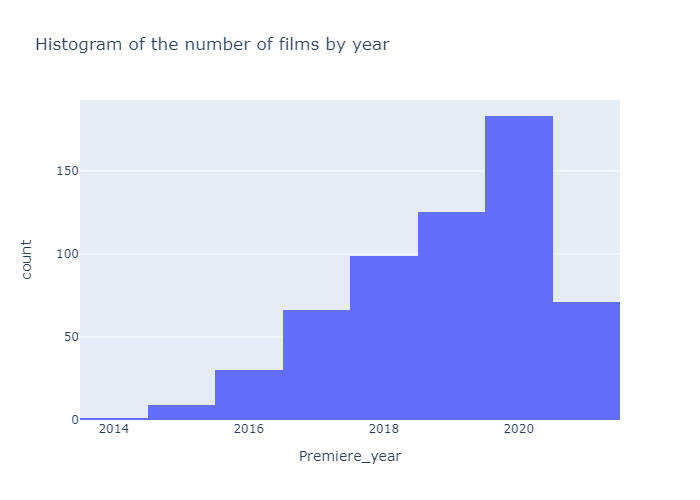

In [39]:
fig = px.histogram(df, x="Premiere_year",
                    title="Histogram of the number of films by year")
fig.show('png')

Low number of movies in 2021 because dataset is only up to 2021-06-01

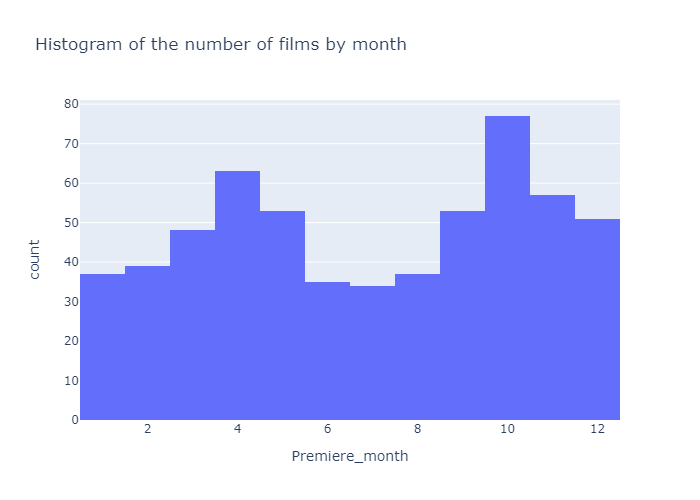

In [40]:
fig = px.histogram(df, x="Premiere_month",
                    title="Histogram of the number of films by month")
fig.show('png')                    

#### *- Movies are most premiered in October, maybe because that is the time at the end of the year, people will have many holidays such as christmas and new year*
#### *- The least number of films released in the summer period*

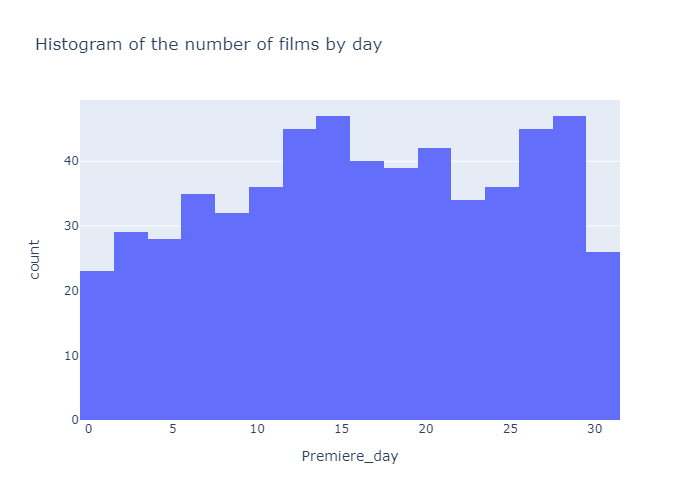

In [38]:
fig = px.histogram(df, x="Premiere_day",
                    title="Histogram of the number of films by day")
fig.show('png')

In [12]:
day_of_week = df['Premiere'].dt.day_name().value_counts()
day_of_week

Friday       383
Wednesday     82
Thursday      59
Tuesday       29
Monday        17
Sunday         9
Saturday       5
Name: Premiere, dtype: int64

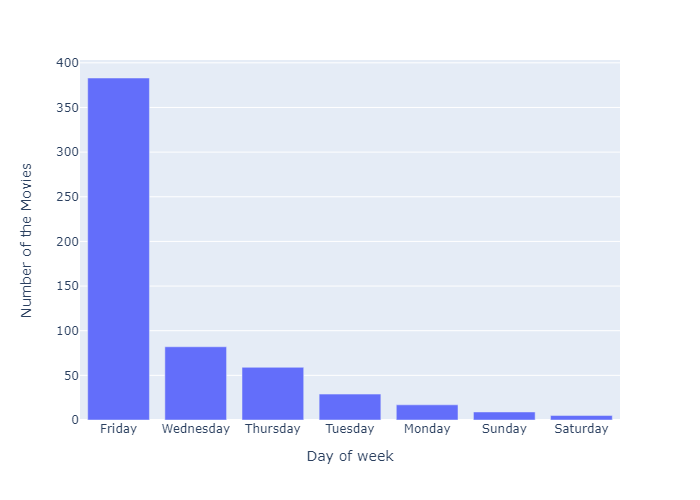

In [41]:
fig = px.bar(df, x=day_of_week.index, y=day_of_week.values, labels={"y":"Number of the Movies", "x":"Day of week"})
fig.show('png')

#### - Friday has the largest number of movies because employees who work through Friday will get a break, and movies will get more views.
#### - Saturday and Sunday have the least number of premiered movies

### 2. Genre Analysis

In [14]:
df['Genre'].unique()

array(['Documentary', 'Thriller', 'Science fiction/Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy',
       'Heist film/Thriller', 'Musical/Western/Fantasy', 'Drama',
       'Romantic comedy', 'Action comedy', 'Horror anthology',
       'Political thriller', 'Superhero-Comedy', 'Horror',
       'Romance drama', 'Anime / Short', 'Superhero', 'Heist', 'Western',
       'Animation/Superhero', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Animation',
       'Aftershow / Interview', 'Christmas musical',
       'Science fiction adventure', 'Science fiction', 'Variety show',
       'Comedy-drama', 'Comedy/Fantasy/Family', 'Supernatural drama',
       'Action/Comedy', 'Action/Science fiction',
       'Romantic teenage drama', 'Comedy / Musical', 'Musical',
       'Science fiction/Mystery', 'Crime drama',
       'Psychological thriller drama', 'Adventure/Comedy', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Rom

In [15]:
df['Genre'].str.split('/', expand=True)

,0,1,2,3
0,Documentary,None,None,None
1,Thriller,None,None,None
2,Science fiction,Drama,None,None
3,Horror thriller,None,None,None
4,Mystery,None,None,None
...,...,...,...,...
579,Concert Film,None,None,None
580,Documentary,None,None,None
581,One-man show,None,None,None
582,Documentary,None,None,None


In [16]:
# split genre into different rows
# only one genre in one rows
genre_split = df.copy()
genre_split = genre_split.drop('Genre', axis=1).join(genre_split['Genre'].str.split('/', expand=True).stack().reset_index(level=1, drop=True).rename('Genre'))
genre_split


,Title,Premiere,Runtime,IMDB Score,Language,Premiere_year,Premiere_month,Premiere_day,Genre
0,Enter the Anime,2019-08-05,58,2.5,English/Japanese,2019,8,5,Documentary
1,Dark Forces,2020-08-21,81,2.6,Spanish,2020,8,21,Thriller
2,The App,2019-12-26,79,2.6,Italian,2019,12,26,Science fiction
2,The App,2019-12-26,79,2.6,Italian,2019,12,26,Drama
3,The Open House,2018-01-19,94,3.2,English,2018,1,19,Horror thriller
...,...,...,...,...,...,...,...,...,...
579,Taylor Swift: Reputation Stadium Tour,2018-12-31,125,8.4,English,2018,12,31,Concert Film
580,Winter on Fire: Ukraine's Fight for Freedom,2015-10-09,91,8.4,English/Ukranian/Russian,2015,10,9,Documentary
581,Springsteen on Broadway,2018-12-16,153,8.5,English,2018,12,16,One-man show
582,Emicida: AmarElo - It's All For Yesterday,2020-12-08,89,8.6,Portuguese,2020,12,8,Documentary


In [17]:
#remove whitespace in genre column with strip()
genre_split['Genre'] = genre_split['Genre'].str.strip()
genre_split['Genre'].unique()


array(['Documentary', 'Thriller', 'Science fiction', 'Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy', 'Heist film',
       'Musical', 'Western', 'Fantasy', 'Romantic comedy',
       'Action comedy', 'Horror anthology', 'Political thriller',
       'Superhero-Comedy', 'Horror', 'Romance drama', 'Anime', 'Short',
       'Superhero', 'Heist', 'Animation', 'Family film',
       'Action-thriller', 'Teen comedy-drama', 'Romantic drama',
       'Aftershow', 'Interview', 'Christmas musical',
       'Science fiction adventure', 'Variety show', 'Comedy-drama',
       'Family', 'Supernatural drama', 'Romantic teenage drama',
       'Crime drama', 'Psychological thriller drama', 'Adventure',
       'Black comedy', 'Romance', 'Horror comedy', 'Christian musical',
       'Romantic teen drama', 'Dark comedy', 'Comedy horror',
       'Psychological thriller', 'Biopic', 'Mockumentary', 'Satire',
       'One-man show', 'Romantic comedy-drama', 'Sports-drama', 'Zombie',
       'Psycholog

In [18]:
# -> as we see here 'Horror comedy' and 'Comedy horror' are the same. 
# 'Comedy-drama' and 'Drama-Comedy'
# 'Heist' and 'Heist film'
genre_split['Genre'] = genre_split['Genre'].replace({'Comedy horror':'Horror comedy'})
genre_split['Genre'] = genre_split['Genre'].replace({'Comedy-drama':'Drama-Comedy'})
genre_split['Genre'] = genre_split['Genre'].replace({'Heist film':'Heist'})
genre_split['Genre'].unique()

array(['Documentary', 'Thriller', 'Science fiction', 'Drama',
       'Horror thriller', 'Mystery', 'Action', 'Comedy', 'Heist',
       'Musical', 'Western', 'Fantasy', 'Romantic comedy',
       'Action comedy', 'Horror anthology', 'Political thriller',
       'Superhero-Comedy', 'Horror', 'Romance drama', 'Anime', 'Short',
       'Superhero', 'Animation', 'Family film', 'Action-thriller',
       'Teen comedy-drama', 'Romantic drama', 'Aftershow', 'Interview',
       'Christmas musical', 'Science fiction adventure', 'Variety show',
       'Drama-Comedy', 'Family', 'Supernatural drama',
       'Romantic teenage drama', 'Crime drama',
       'Psychological thriller drama', 'Adventure', 'Black comedy',
       'Romance', 'Horror comedy', 'Christian musical',
       'Romantic teen drama', 'Dark comedy', 'Psychological thriller',
       'Biopic', 'Mockumentary', 'Satire', 'One-man show',
       'Romantic comedy-drama', 'Sports-drama', 'Zombie',
       'Psychological horror', 'Sports film', 'C

In [19]:
genre_split['Genre'].value_counts(normalize=True)*100

Documentary          24.727838
Drama                12.752722
Comedy                9.331260
Romantic comedy       6.220840
Thriller              5.909798
                       ...    
Christmas comedy      0.155521
War-Comedy            0.155521
Adventure-romance     0.155521
Dance comedy          0.155521
Anthology             0.155521
Name: Genre, Length: 88, dtype: float64

We have 88 different genres

In [20]:
genre = genre_split['Genre'].value_counts().nlargest(30)

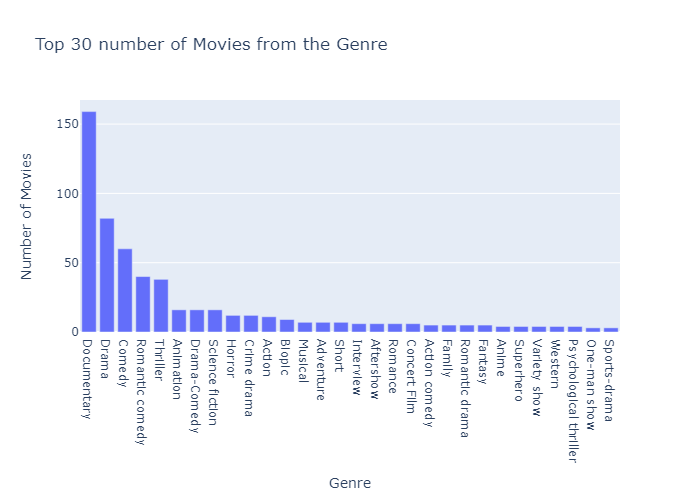

In [42]:
fig = px.bar(genre, y=genre.values, x=genre.index, title="Top 30 number of Movies from the Genre",
        labels={'index': 'Genre', 'y':'Number of Movies'})
fig.show('png')

#### --> *The documentary genre is the most genre whose movies premiered on Netflix*

### 3. Runtime analysis

In [22]:
df['Runtime'].describe()

count    584.000000
mean      93.577055
std       27.761683
min        4.000000
25%       86.000000
50%       97.000000
75%      108.000000
max      209.000000
Name: Runtime, dtype: float64

In [23]:
df[df['Runtime']==df['Runtime'].max()]
# The longest movie is called 'The Irishman' with 209 minutes

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere_year,Premiere_month,Premiere_day
561,The Irishman,Crime drama,2019-11-27,209,7.8,English,2019,11,27


In [24]:
df[df['Runtime']==df['Runtime'].min()]
# The shortest movie is called 'Sol Levante' with 4 minutes

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere_year,Premiere_month,Premiere_day
40,Sol Levante,Anime / Short,2020-04-02,4,4.7,English,2020,4,2


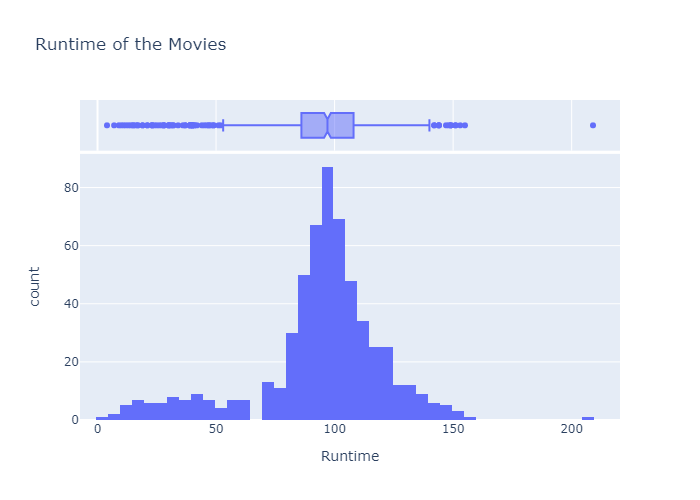

In [43]:
fig = px.histogram(df, x=df['Runtime'], title="Runtime of the Movies", marginal='box')
fig.show('png')

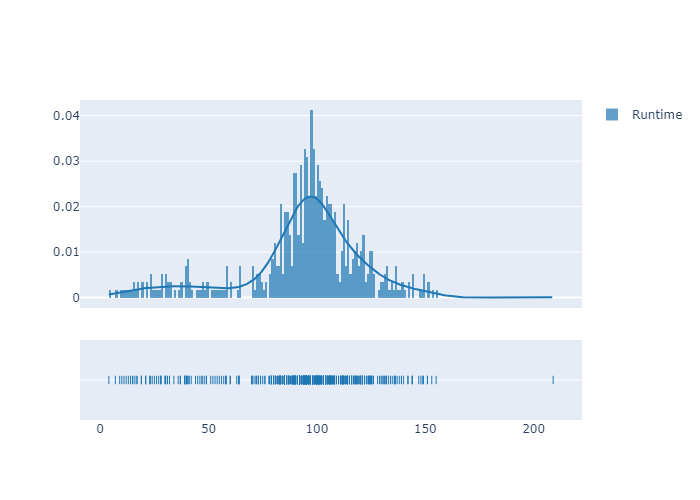

In [44]:
hist_data = [df['Runtime']]
group_labels = ['Runtime'] # name of the dataset

fig = ff.create_distplot(hist_data, group_labels)
fig.show('png')

#### --> *Runtime distribution skewed to the left*

### 4. Language analysis

In [27]:
language = df['Language'].str.split('/', expand=True).stack().reset_index(level=1, drop=True).value_counts()
language

English       422
Spanish        39
Hindi          35
French         21
Italian        14
Portuguese     12
Indonesian      9
Japanese        8
Korean          7
German          5
Turkish         5
Mandarin        3
Polish          3
Marathi         3
Dutch           3
Filipino        2
Thai            2
Swedish         2
Russian         2
Bengali         1
Akan            1
Arabic          1
Tamil           1
Khmer           1
Thia            1
Georgian        1
Norwegian       1
Malay           1
Taiwanese       1
Catalan         1
Basque          1
Ukranian        1
dtype: int64

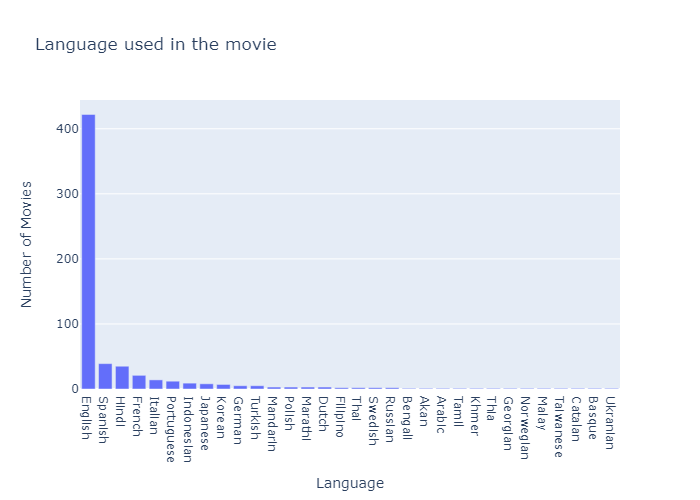

In [45]:
fig = px.bar(language, x=language.index, y=language.values, title='Language used in the movie',
        labels={'y':'Number of Movies', 'index':'Language'})
fig.show('png')        

#### Top 5 most used languages in movies
##### 1. English
##### 2. Spanish
##### 3. Hindi
##### 4. French
##### 5. Italian

### 5. IMDB Score Analysis

In [29]:
df['IMDB Score'].describe()

count    584.000000
mean       6.271747
std        0.979256
min        2.500000
25%        5.700000
50%        6.350000
75%        7.000000
max        9.000000
Name: IMDB Score, dtype: float64

In [30]:
df[df['IMDB Score']==df['IMDB Score'].max()]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere_year,Premiere_month,Premiere_day
583,David Attenborough: A Life on Our Planet,Documentary,2020-10-04,83,9.0,English,2020,10,4


In [31]:
df[df['IMDB Score']==df['IMDB Score'].min()]

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere_year,Premiere_month,Premiere_day
0,Enter the Anime,Documentary,2019-08-05,58,2.5,English/Japanese,2019,8,5


#### - The highest imdb score of 9 points belongs to the movie 'David Attenborough: A Life on Our Planet'
#### - The lowest imdb score of 2.5 points belongs to the movie 'Enter the Anime'
#### - Both movies are documentary genre

### *Is there any correlation?*

In [32]:
corr_matrix = df.corr(method="pearson")
corr_matrix

,Runtime,IMDB Score,Premiere_year,Premiere_month,Premiere_day
Runtime,1.000000,-0.040896,0.069262,-0.035550,-0.024225
IMDB Score,-0.040896,1.000000,-0.141347,0.108623,0.057651
Premiere_year,0.069262,-0.141347,1.000000,-0.219262,-0.052283
Premiere_month,-0.035550,0.108623,-0.219262,1.000000,-0.041895
Premiere_day,-0.024225,0.057651,-0.052283,-0.041895,1.000000


<AxesSubplot:>

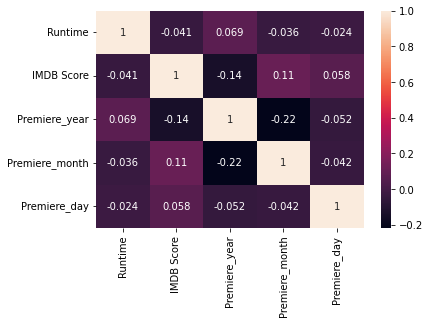

In [33]:
sns.heatmap(corr_matrix, annot=True)

In [34]:
df_numerized = df.copy()

In [35]:
for col in df_numerized.columns:
    if(df_numerized[col].dtype=='object'):
        df_numerized[col] = df_numerized[col].astype('category')
        df_numerized[col] = df_numerized[col].cat.codes
df_numerized

,Title,Genre,Premiere,Runtime,IMDB Score,Language,Premiere_year,Premiere_month,Premiere_day
0,147,45,2019-08-05,58,2.5,6,2019,8,5
1,120,106,2020-08-21,81,2.6,29,2020,8,21
2,433,93,2019-12-26,79,2.6,20,2019,12,26
3,500,63,2018-01-19,94,3.2,2,2018,1,19
4,243,73,2020-10-30,90,3.4,18,2020,10,30
...,...,...,...,...,...,...,...,...,...
579,425,40,2018-12-31,125,8.4,2,2018,12,31
580,575,45,2015-10-09,91,8.4,13,2015,10,9
581,410,74,2018-12-16,153,8.5,2,2018,12,16
582,145,45,2020-12-08,89,8.6,28,2020,12,8


In [36]:
corr_matrix = df_numerized.corr(method="pearson")
corr_matrix

,Title,Genre,Runtime,IMDB Score,Language,Premiere_year,Premiere_month,Premiere_day
Title,1.000000,0.053652,0.096852,-0.029844,-0.022592,-0.010128,-0.091728,-0.056876
Genre,0.053652,1.000000,0.201278,-0.180935,0.053456,0.018715,-0.038760,0.062394
Runtime,0.096852,0.201278,1.000000,-0.040896,0.116494,0.069262,-0.035550,-0.024225
IMDB Score,-0.029844,-0.180935,-0.040896,1.000000,-0.153751,-0.141347,0.108623,0.057651
Language,-0.022592,0.053456,0.116494,-0.153751,1.000000,0.302149,-0.037216,-0.002101
Premiere_year,-0.010128,0.018715,0.069262,-0.141347,0.302149,1.000000,-0.219262,-0.052283
Premiere_month,-0.091728,-0.038760,-0.035550,0.108623,-0.037216,-0.219262,1.000000,-0.041895
Premiere_day,-0.056876,0.062394,-0.024225,0.057651,-0.002101,-0.052283,-0.041895,1.000000


<AxesSubplot:>

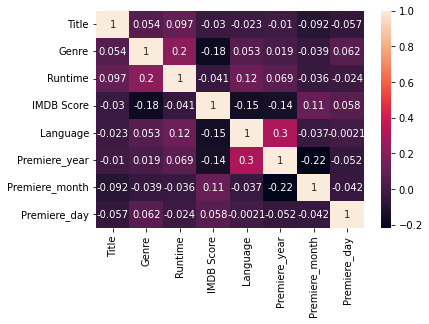

In [37]:
sns.heatmap(corr_matrix, annot=True)

#### --> There is not much correlation between the attributes